# Results

After looking at the previous notebook where it was discussed how entropy values effect password strengths, I went ahead and made a script which I thought would strengthen passwords by using the entropy values. The chart of entropy strength is shown below:

In [1]:
from IPython.display import display
import pandas as pd

# password strengths
strengths = {"28 bits": "Very Weak",
             "28 - 35 bits": "Weak",
             "36 - 59 bits": "Reasonable",
             "60 - 127 bits": "Strong",
             "128+ bits": "Overkill"}

# data frame for passwords
st = pd.DataFrame({"Entropy": list(strengths.keys()), "Strength": list(strengths.values())})

display(st)

,Entropy,Strength
0,28 bits,Very Weak
1,28 - 35 bits,Weak
2,36 - 59 bits,Reasonable
3,60 - 127 bits,Strong
4,128+ bits,Overkill


The following piece of code is just a little tweaked version of the script passtronger.py, which is in this same folder. And this script takes in a password, checks if it's strong, and if not it returns a password that is stronger.

This is achieved by looking for character sets that are not present in the password, and including them. If the entropy values are still not increased, I append punctuation values or numbers to the front or back of the password, because I believe that having jumbled letters and punctuations makes it more difficult to remember - and it's easier if inorganically placed characters are placed at the end or beginning instead.

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import string

# SCRIPT THAT MAKES PASSWORD STRONGER 
# dict that keeps track of what types of characters are used
sets = {'d':0, 'p':0, 'l':0, 'u':0}

# assigning corresponding keys to groups
types = {}
types['d_vals'] = string.digits
types['p_vals'] = string.punctuation
types['l_vals'] = string.ascii_lowercase
types['u_vals'] = string.ascii_uppercase

# entropy calculation
def entropy(pw):
    charset = 0
    plist = list(pw)

    if [val for val in plist if val in set(types['d_vals'])]:
        charset += len(types['d_vals'])
        sets['d'] = 1
    if [val for val in plist if val in set(types['p_vals'])]:
        charset += len(types['p_vals'])
        sets['p'] = 1
    if [val for val in plist if val in set(types['l_vals'])]:
        charset += 26
        sets['l'] = 1
    if [val for val in plist if val in set(types['u_vals'])]:
        charset += 26
        sets['u'] = 1

    # entropy calculation
    N = charset ** len(pw)
    ent = np.math.log(N, 2)

    return float("{:.2f}".format(ent))

# deciding what to do with the password
def what(pw):
    # entropy of the password
    pass_ent = entropy(pw)
    if pass_ent < 60:
        new = make_stronger(pw)
        return new
    else:
        return pw

def make_stronger(pw):
    # if there are no letters at all, add some until len is at least 8
    if not sets['l'] and not sets['u']:
        temp = ['l', 'u']
        while len(pw) < 8:
            n = np.random.randint(0,2)
            if n == 0:
                sets['l'] = 1
            else:
                sets['u'] = 1
            pw = types[temp[n] + '_vals'][np.random.randint(0,len(types[temp[n] + '_vals']))] + pw

    # going through the types that are missing and adding them
    for x in ['d', 'p']:
        if not sets[x]:
            pw += types[x + '_vals'][np.random.randint(0,len(types[x + '_vals']))]
            sets[x] = 1

    # if there are no lowercase letters, add some
    if not sets['l']:
        for i in range(len(pw)):
            if pw[i].isupper():
                pw = list(pw)
                pw[i] = pw[i].lower()
                pw = ''.join(pw)
                break
        sets['l'] = 1

    # if there are no uppercase letters, add some
    if not sets['u']:
        for i in range(len(pw)):
            if pw[i].islower():
                pw = list(pw)
                pw[i] = pw[i].upper()
                pw = ''.join(pw)
                break
        sets['u'] = 1

    # evaluating the redone pw
    if entropy(pw) > 60:
        return pw
    else:
        temp = ['d', 'p']
        x = temp[np.random.randint(0, 2)]
        while entropy(pw) <= 60:
            pw = types[x + '_vals'][np.random.randint(0,len(types[x + '_vals']))] + pw
            pw += types[x + '_vals'][np.random.randint(0,len(types[x + '_vals']))]
            sets[x] = 1
        return pw

This next bit of code compiles the dataframe and columns with the new passwords, and entropy values.

In [3]:
# recreate the dataframe with the passwords
p = pd.read_csv('8-more-passwords.txt', delim_whitespace=True, header=None) # reading csv with passwords
p.columns = ['Old Passwords']

In [4]:
# add all the entropy values to the df
p['Old Entropy'] = [entropy(x) for x in p.loc[:, 'Old Passwords']]

In [5]:
# include new passwords in the table
p['New Passwords'] = [what(x) for x in p.loc[:, 'Old Passwords']]

In [6]:
# add all the entropy values to the df
p['New Entropy'] = [entropy(x) for x in p.loc[:, 'New Passwords']]

/Users/Yatin/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


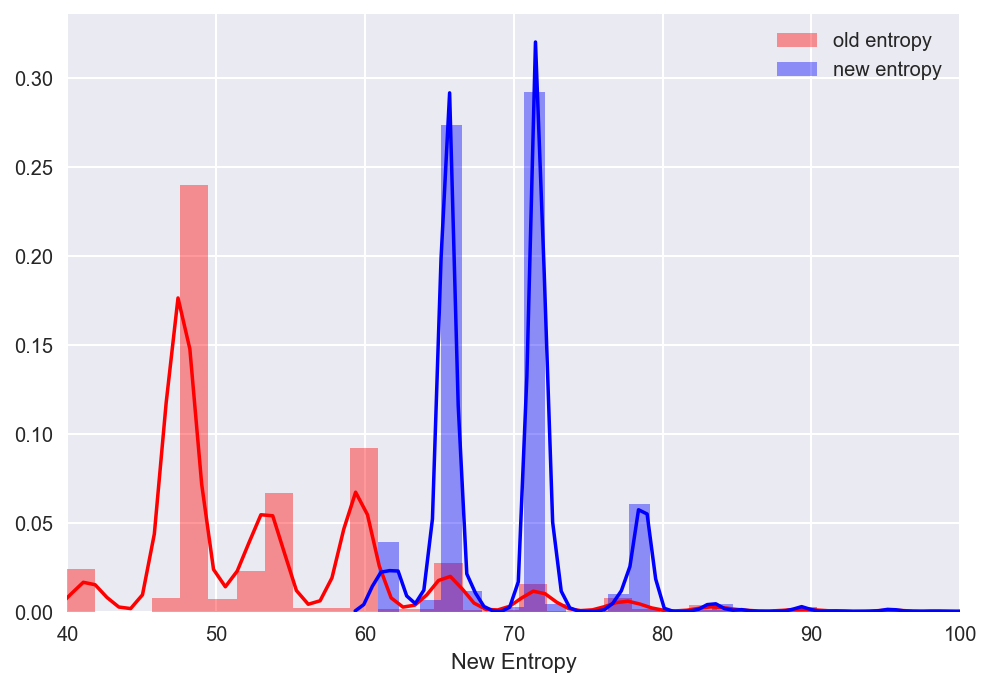

In [7]:
# plotting the differences between the two graphs
sns.distplot(p['Old Entropy'], color='red', label='old entropy')
sns.distplot(p['New Entropy'], color='blue', label='new entropy')
plt.xlim(40,100)
plt.legend()

Evidently, the script produces stronger passwords. And statistically, the average entropy has increased by:

In [8]:
old = np.mean(p['Old Entropy'])
new = np.mean(p['New Entropy'])

old = float("{:.2f}".format(old))
new = float("{:.2f}".format(new))

change = (((new - old) / old) * 100)
print("old entropy average:")
print(old)
print("new entropy average:")
print(new)
print("percentage increase in entropy:")
print("{:.2f}%".format(change))

old entropy average:
53.38
new entropy average:
69.52
percentage increase in entropy:
30.24%


Thus, the script has made passwords, on average, 30% stronger, when measured by entropy values.